# This is how I'll want to use the inversion package on simple problems

In [29]:
%matplotlib inline
from __future__ import print_function, division
from future.builtins import super, range
import numpy as np
import matplotlib.pyplot as plt
from fatiando import utils
# from inversion import LinearMisfit

In [35]:
x = np.linspace(0, 100, 200)
y = 0.5*(x - 50)**3 + 1*x + 1000
yo = utils.contaminate(y, 0.2, percent=True)

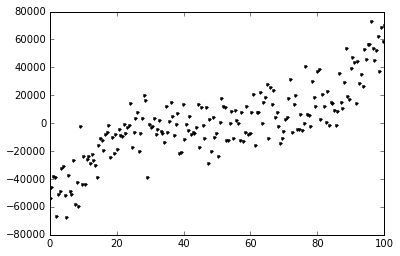

In [36]:
plt.plot(x, yo, '.k')

In [ ]:
class Regression(LinearMisfit):
    def __init__(self, degree):
        super().__init__(nparams=(degree + 1))
        self.degree = degree
        
    def predict(self, p, x):
        return sum(p[i]*x**i for i in range(self.nparams))
        
    def jacobian(self, p, x):
        A = np.empty((x.size, self.nparams))
        for i in range(self.nparams):
            A[:, i] = x**i
        return A
    
    def fit(self, x, y):
        self.optimize(data=y, extra=dict(x=x))
        return self
    
    def fmt_estimate(self, p):
        eq = ' + '.join(['{:g}^{}'.format(p[i], i) for i in range(self.nparams)])
        return eq

In [ ]:
reg = Regression(3)
reg.fit(x, yo).p_

In [ ]:
reg.estimate_
# Should print the equation

In [ ]:
plt.plot(x, yo, '.k')
plt.plot(x, reg.predict(x), '-r')

In [ ]:
reg.predict(x) is reg.predict(x)

In [ ]:
reg.predict(x) is not reg.predict(x + 1)

In [ ]:
A1 = reg.jacobian(reg.p_, x)

In [ ]:
reg.config(method='newton', intial=[1, 1, 1]).fit(x, yo).estimate_

In [ ]:
reg.jacobian(reg.p_, x) is A1

In [ ]:
plt.plot(x, yo, '.k')
plt.plot(x, reg.predict(x), '-r')

# Using cross-validation

In [40]:
int(np.floor(0.6*200))

120

In [41]:
whole = np.random.permutation(x.size)
divide = int(0.6*x.size)
train, test = whole[:divide], whole[divide:]

In [ ]:
degrees = list(range(1, 10))
scores = [Regression(i).fit(x[train], yo[train]).score(x[test], yo[test])
          for i in degrees]
best = degrees[np.argmin(scores)]
best

In [ ]:
plt.plot(degrees, scores, '.-k')

In [ ]:
reg = Regression(best).fit(x, yo)
reg.estimate_

In [ ]:
plt.plot(x, yo, '.k')
plt.plot(x, reg.predict(x), '-r')